In [11]:
from openpyxl import Workbook, load_workbook
import numpy as np 
import os
import pandas as pd

In [13]:
grease_base = pd.read_csv('final_matrix.csv')
display(grease_base)
print(np.shape(grease_base))

,name,date_apr,date,lot,kettle,compay,wled,base_oil_pct,base_gr_pct,liq_add_pct,...,total_pct,pen,elco_xx,Flag for Removal,thickener,adj_base_pct,adj_sol_pct,adj_liq_pct,adj_si_pct,rework
0,Cotton Picker Greaes #00,10/6/23,279,Z04048I,B2,SC Fuels,none,0.688434,0.30,0.01,...,1.0,422,False,False,LI,0.955576,0.000000,0.044424,0.0,0.0
1,Cotton Picker Greaes #00,10/12/23,285,Z11127I,B2,SC Fuels,none,0.696987,0.29,0.02,...,1.0,401,False,False,LI,0.944287,0.000000,0.055713,0.0,0.0
2,Cotton Picker Greaes #00,10/17/23,290,Z16147I,B2,SC Fuels,none,0.783941,0.20,0.01,...,1.0,407,False,False,LI,0.943373,0.000000,0.056627,0.0,0.0
3,Cotton Picker Greaes #00,10/19/23,292,Z18212I,B2,SC Fuels,none,0.560342,0.43,0.01,...,1.0,408,False,False,LI,0.971939,0.000000,0.028061,0.0,0.0
4,Cotton Picker Greaes #00,10/13/23,286,Z13146I,B2,SC Fuels,none,0.788682,0.20,0.01,...,1.0,410,False,False,LI,0.943145,0.000000,0.056855,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,SCA 680,8/20/22,232,X15119H,Mooney,Hughes,800 kg weld SCAR <1.65,0.000000,0.68,0.10,...,1.0,317,False,False,CAX,0.684513,0.212013,0.103473,0.0,0.0
858,SCA 680,6/19/23,170,V08065I,Mooney,Hughes,800 kg weld SCAR <1.65,0.043093,0.68,0.07,...,1.0,304,False,False,CAX,0.705849,0.218060,0.076091,0.0,0.0
859,TomCat 150 #2,8/11/22,223,X10096H,Mooney,GC,500 kg,0.183878,0.77,0.01,...,1.0,275,False,False,SMG,0.945836,0.042718,0.011446,0.0,0.0
860,XB 9700 220 #2,6/30/22,181,V23175H,Mooney,Blue Star,200 kg,0.047582,0.90,0.05,...,1.0,288,False,False,LX,0.945237,0.000000,0.054763,0.0,0.0


(862, 22)


In [14]:
# REFINE DATA

#assign an integer value to each kettle
grease_base.kettle.replace(('B2', 'Bentone', 'BK1', 'BK2', 'BK3', 'BK4', 'K2', 'Meyers', 'Mooney'),
                      (1, 2, 3, 4, 5, 6, 7, 8, 9), inplace=True)
# assign an integer value to each thickener type                      
grease_base.thickener.replace(('AX', 'CAX', 'LI', 'LX', 'RSC', 'SMG'), (1, 2, 3, 4, 5, 6),
                              inplace=True)
# change elco complex boolean to (0,1)                              
grease_base.elco_xx.replace((False, True), (0, 1), inplace=True)

grease_base = grease_base.drop(columns=['name'])
grease_base = grease_base.drop(columns=['lot'])
grease_base = grease_base.drop(columns=['date_apr'])
grease_base = grease_base.drop(columns=['wled'])
grease_base = grease_base.drop(columns=['compay'])
grease_base = grease_base.drop(columns=['Flag for Removal'])
grease_base = grease_base.drop(columns=['base_gr_pct'])
grease_base = grease_base.drop(columns=['sol_add_pct'])
grease_base = grease_base.drop(columns=['liq_add_pct'])
grease_base = grease_base.drop(columns=['si_pct'])
grease_base = grease_base.drop(columns=['total_pct'])


display(grease_base)




,date,kettle,base_oil_pct,pen,elco_xx,thickener,adj_base_pct,adj_sol_pct,adj_liq_pct,adj_si_pct,rework
0,279,1,0.688434,422,0,3,0.955576,0.000000,0.044424,0.0,0.0
1,285,1,0.696987,401,0,3,0.944287,0.000000,0.055713,0.0,0.0
2,290,1,0.783941,407,0,3,0.943373,0.000000,0.056627,0.0,0.0
3,292,1,0.560342,408,0,3,0.971939,0.000000,0.028061,0.0,0.0
4,286,1,0.788682,410,0,3,0.943145,0.000000,0.056855,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
857,232,9,0.000000,317,0,2,0.684513,0.212013,0.103473,0.0,0.0
858,170,9,0.043093,304,0,2,0.705849,0.218060,0.076091,0.0,0.0
859,223,9,0.183878,275,0,6,0.945836,0.042718,0.011446,0.0,0.0
860,181,9,0.047582,288,0,4,0.945237,0.000000,0.054763,0.0,0.0


In [15]:
# Separate the target variable
X_data = grease_base.drop(['base_oil_pct'],axis=1).values
y_data = grease_base['base_oil_pct'].values
y_data = y_data.reshape(-1,1)


In [16]:
# split the data into train & test sets
from sklearn.model_selection import train_test_split
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

print(np.shape(X_train), np.shape(X_test))
print(np.shape(y_train), np.shape(y_test))


(689, 10) (173, 10)
(689, 1) (173, 1)


In [17]:
## taken from HW 5
def rec(m, n, tol):
    if not type(m) == 'numpy.ndarray':
        m = np.array(m) #change m to a np array
    if not type(n) == 'numpy.ndarray':
        n = np.array(n) #change n to a np array

    l = m.size
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


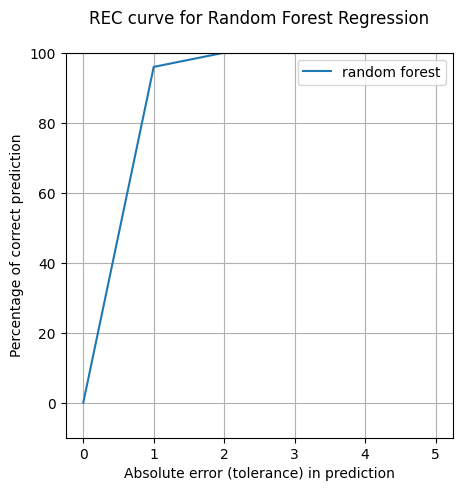

In [23]:
# RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt

forest_model = RandomForestRegressor(n_estimators=50)

forest_model.fit(X_train, y_train)
forest_model.score(X_test, y_test)
y_pred_rfr = forest_model.predict(X_test)

tol_max = 6
rec_lr = []
# get REC curve
for i in range(tol_max):
    rec_lr.append(rec(y_pred_rfr, y_test, i))
# plot REC curve
plt.figure(figsize=(5,5))
plt.title("REC curve for Random Forest Regression\n")
plt.xlabel("Absolute error (tolerance) in prediction")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(tol_max+1)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max), rec_lr, label='random forest')
plt.legend()
plt.show()
